<a href="https://colab.research.google.com/github/DhiaAkermii/neuralnetwork/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1-Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet
data = pd.read_csv('/content/drive/MyDrive/tp2RN/Iris.csv')

In [ ]:
#2-Afficher les 10 premières lignes du DataFrame.
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#3-Afficher les dimensions du dataframe
print(data.shape)

(150, 6)


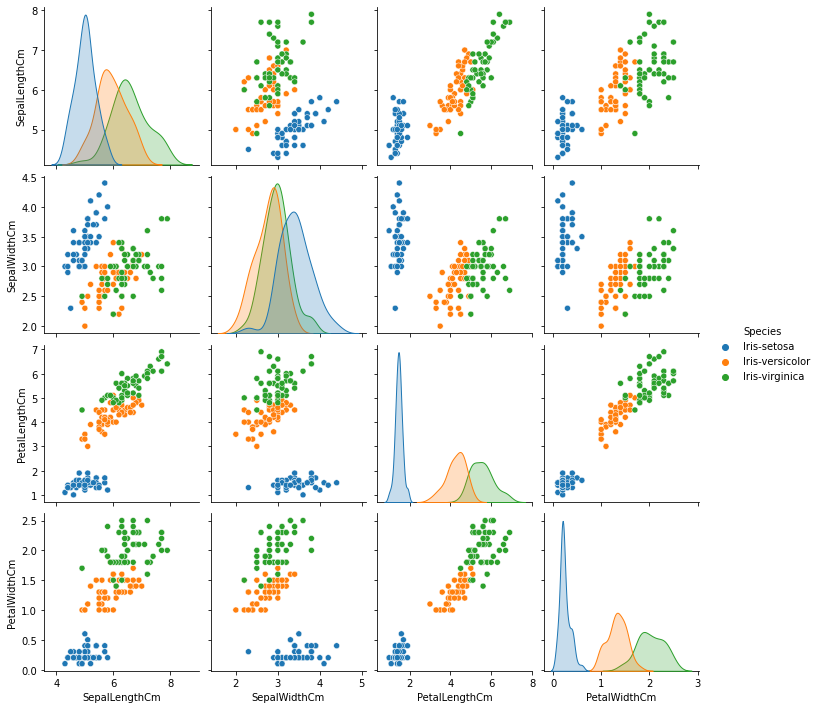

In [ ]:
#4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
import seaborn as sns #pour la visualisation des données
sns.pairplot(data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species')


In [ ]:
print(data)
print(data.axes[0])
print(data.axes[1])

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
#5-labelliser les différentes espèces d’iris
#méthode 1 : 
target = data[['Species']].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])
target.sample(5)
#target.head(10)

,Species
64,1
10,0
86,1
31,0
87,1


In [ ]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.
# méthode 2:
def label(data2): 
  for i in range(len(data2.axes[0])):
    for j in range(len(data2.axes[1])):
      if data2.iloc[i,j]=="Iris-setosa":
        data2.iloc[i,j]=0
      elif data2.iloc[i,j]=="Iris-virginica":
        data2.iloc[i,j]=2
      elif data2.iloc[i,j]=="Iris-versicolor":
        data2.iloc[i,j]=1
  return data2

In [ ]:
# 6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
norm=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df= pd.concat([norm, target], axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
75,6.6,3.0,4.4,1.4,1
27,5.2,3.5,1.5,0.2,0
126,6.2,2.8,4.8,1.8,2
46,5.1,3.8,1.6,0.2,0
138,6.0,3.0,4.8,1.8,2
95,5.7,3.0,4.2,1.2,1
36,5.5,3.5,1.3,0.2,0
86,6.7,3.1,4.7,1.5,1
131,7.9,3.8,6.4,2.0,2
40,5.0,3.5,1.3,0.3,0


In [ ]:
#7 Ecrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).

train, test = model_selection.train_test_split(df, test_size =0.3)
xtrain = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
ytrain = train.Species
xtest = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
ytest = test.Species

In [ ]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
#Afficher les x et les y de train : 
xtrain.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,4.4,3.0,1.3,0.2
98,5.1,2.5,3.0,1.1
111,6.4,2.7,5.3,1.9
148,6.2,3.4,5.4,2.3
20,5.4,3.4,1.7,0.2
83,6.0,2.7,5.1,1.6
80,5.5,2.4,3.8,1.1
101,5.8,2.7,5.1,1.9
28,5.2,3.4,1.4,0.2
144,6.7,3.3,5.7,2.5


In [ ]:
ytrain.head(10)

38     0
98     1
111    2
148    2
20     0
83     1
80     1
101    2
28     0
144    2
Name: Species, dtype: int64

In [ ]:
xtest.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
3,4.6,3.1,1.5,0.2
90,5.5,2.6,4.4,1.2
71,6.1,2.8,4.0,1.3
24,4.8,3.4,1.9,0.2
36,5.5,3.5,1.3,0.2
47,4.6,3.2,1.4,0.2
89,5.5,2.5,4.0,1.3
5,5.4,3.9,1.7,0.4
50,7.0,3.2,4.7,1.4


In [ ]:
ytest.head(10)

21    0
3     0
90    1
71    1
24    0
36    0
47    0
89    1
5     0
50    1
Name: Species, dtype: int64

In [ ]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur 
#(‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150).

from sklearn.neural_network import MLPClassifier
rna = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), epsilon=0.07, random_state=1, max_iter=150)
rna.fit(xtrain, ytrain)


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, random_state=1, solver='lbfgs')

In [ ]:
prediction = rna.predict(xtest)
print(prediction)

[0 0 1 1 0 0 0 1 0 1 1 2 0 2 1 0 2 0 2 1 2 0 0 0 0 2 1 2 1 2 2 2 2 2 0 2 0
 0 1 0 2 0 1 1 2]


In [ ]:
print(ytest.values)

[0 0 1 1 0 0 0 1 0 1 2 2 0 2 1 0 2 0 2 1 1 0 0 0 0 2 1 2 1 2 2 2 2 2 0 2 0
 0 1 0 2 0 1 1 2]


In [ ]:
#Affichage des coefficients : 
print(rna.coefs_)
print(rna.intercepts_)

[array([[ -0.15363599,   5.8191953 ,  -0.92555171],
       [ -0.36598657,   6.13781476,  -0.75479608],
       [ -0.58089767,  -8.31463399,  -0.1911378 ],
       [  0.07187023, -12.44904147,   0.3429389 ]]), array([[ 0.34091417, -0.16538028,  0.11737248],
       [-4.31958634, -0.69142079, -2.60952177],
       [ 0.93646587, -0.37312882,  0.38462171]]), array([[-5.48551569, -1.38635046,  6.04597208],
       [-9.14516873,  6.2973795 ,  2.80247997],
       [ 2.5371973 , -1.72567382, -0.73041238]])]
[array([-0.5472481 ,  7.83169285, -0.87510813]), array([ 9.18171676, 12.78375324, -3.09999967]), array([ 21.62122013,  -0.76767945, -20.77471093])]


In [ ]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.

%time
print('MLP accuracy :', metrics.accuracy_score(prediction, ytest))
print('Error rate :', 1-metrics.accuracy_score(prediction, ytest))

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 24.3 µs
MLP accuracy : 0.9555555555555556
Error rate : 0.0444444444444444


In [ ]:
pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


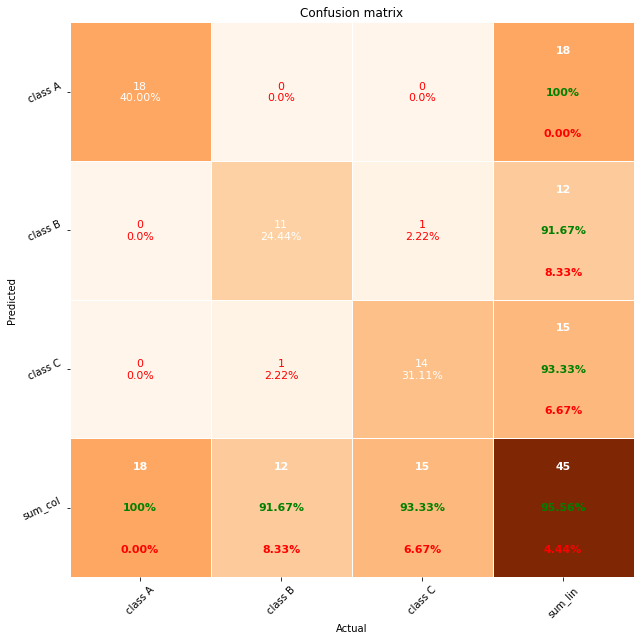

In [ ]:
#11-Afficher la matrice de confusion associée à notre cas.

from pretty_confusion_matrix import pp_matrix_from_data

cmap = 'PuRd'
pp_matrix_from_data(ytest.values, prediction)


#12- Selon les résultats affichés commenter le perceptron que vous avez utilisé.
-Axe des abscisses : Actual 

-Axe de coordonnées : Predicted

La taille du dataset est 150. 

150 * 0.7 = 105 pour la base d'apprentissage.  
150 * 0.3 = 45 pour la base de test.

-La matrice de confusion concerne uniquement la base de test. 
- Lorsqu’on fait la somme de cette matrice on obtient 18+0+0+0+11+1+0+1+14=45

18+0+0 = 18 (nombre d'exemple de la classe A=.) 

0+11+1 =12  (nombre d'exemple de la classe B=.) 

0+21+14 = 15 (nombre d'exemple de la classe C=.) 

Les vrais positifs ou TP (true positive) indiquent les cas où les prédictions et les valeurs réelles sont effectivement positives.

Dans notre cas on a : 

TP(A) =  18
TP(B) =  11
TP(C) =  14

  TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative.
Dans notre cas on a :

TN(A) = 27

TN(B) = 22 

TN(C) = 29 

-FP (False Positive) : le nombre de prédictions positives incorrectes.

FP (A) = 0 ==> 100 % juste

FP (B) = 1 ===> (12 --> 100 %, 1 ---> 8.33%, 11-->91.67 %) 
                  
FP (C) = 1  ==> (15 --> 100 %, 1 ---> 6.67%, 14-->93.33 %) 93.33 % juste

Deux fautes seulement dans notre modèle : 
-au lieu de prédire la classe  B, il a prédit C.
-au lieu de prédire la classe  C, il a prédit B.

Accuracy : [40+24.44+31.11]=[18+11+14]/45=95.56%

Loss : [2.22+2.22]=4.44%


In [ ]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
%time

rna2 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3),learning_rate="constant", learning_rate_init=0.7, max_iter=150)
rna2.fit(xtrain, ytrain)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

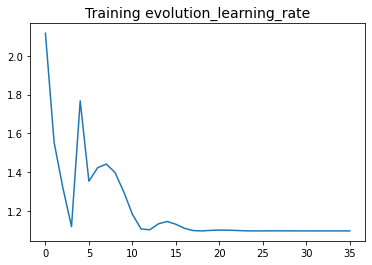

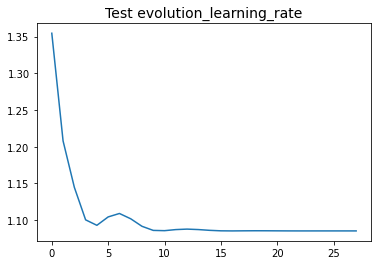

In [ ]:
#14-Nous allons étudier la variation du paramètre de taux d’apprentissage,
# donc nous allons afficher la courbe d'évolution d’apprentissage 
# et celle de test en fonction de variation du taux d’apprentissage.

rna2.fit(xtrain, ytrain)
plt.plot(rna2.loss_curve_)
plt.title("Training evolution_learning_rate", fontsize=14)
plt.show()

rna2.fit(xtest, ytest)
plt.plot(rna2.loss_curve_)
plt.title("Test evolution_learning_rate", fontsize=14)
plt.show()

Comparaison des algorithmes L-BGFS, SGD et Adam : 
Il faut noter que pour SGD (descente de gradient stochastique) la taille par défaut du mini-batch 
dans l’implémentation Scikit-learn (paramètre batch_size) est le minimum entre 200 et le nombre d’exemples. 
En conséquence, dans le cas des données Iris (150 exemples au total), avec les valeurs par défaut des paramètres, 
SGD est une descente de gradient par lot global (batch) et non stochastique.
Nous constatons que le nombre d’itérations est bien plus faible pour lbgfs que pour les deux autres algorithmes,
mais chaque itération est plus coûteuse. Avec lgbfs l’évolution de l’erreur d’apprentissage n’est pas accessible à travers rna.loss_curve_. 
Ensuite, le nombre d’itérations est plus faible pour adam que pour sgd.
Adam est recommandé pour des ensembles de données volumineux, pour des cas plus simples lgbfs est en général plus rapide.

In [ ]:
#15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. 
#Quel est le phénomène constaté ? et comment pouvons- nous surmont
%time
rna3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07,learning_rate_init=0.7, learning_rate="constant", max_iter=1500)
rna3.fit(xtrain, ytrain)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              learning_rate_init=0.7, max_iter=1500, solver='sgd')

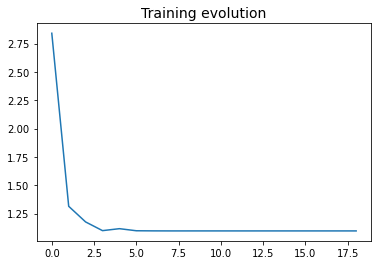

In [ ]:
rna3.fit(xtrain, ytrain)
plt.plot(rna3.loss_curve_)
plt.title("Training evolution", fontsize=14)
plt.show()

#Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci ?
-On constate qu’après 1500 itérations, le phénomène constaté c’est le sur apprentissage.

-On évite ce phénomène par augmenter la taille de la base d’apprentissage et cette base elle doit être hétérogène.   

In [ ]:
#16-Tester d’autres classifieurs de type réseau de neurones (Dynamique/Récurrent et Non récurrent)

from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.utils import np_utils

data2 = data
data2 =label(data2)
x=data2.values[:,0:4]
y=data2.values[:,5]
x=x.reshape(x.shape+(1,))
x = np.asarray(x).astype('float32')
y=np_utils.to_categorical(data2.values[:,5])

xtrain2,xtest2,ytrain2,ytest2=model_selection.train_test_split(x,y,train_size=0.7)

s_rna = Sequential()
s_rna.add(Dense(4,input_shape=(4,),activation='relu'))
s_rna.add(Dense(3,activation='softmax'))

s_rna.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_s_rna = s_rna.fit(xtrain2, ytrain2, epochs=1000, batch_size=32)


Epoch 1/1000
4/4 [==============================] - 2s 10ms/step - loss: 13.8889 - accuracy: 0.3429
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 13.3203 - accuracy: 0.3429
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 12.6672 - accuracy: 0.3429
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 12.0659 - accuracy: 0.3429
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 11.4034 - accuracy: 0.3429
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 10.7889 - accuracy: 0.3429
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 10.1050 - accuracy: 0.3429
Epoch 8/1000
4/4 [==============================] - 0s 13ms/step - loss: 9.4200 - accuracy: 0.3429
Epoch 9/1000
4/4 [==============================] - 0s 8ms/step - loss: 8.7918 - accuracy: 0.3429
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 8.1328 - accuracy: 0.3429
Epoch 11/1

In [ ]:
pred= s_rna.predict(xtest2)
y_test=np.argmax(ytest2,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred

2/2 [==============================] - 0s 6ms/step


array([1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1,
       0])

In [ ]:
y_test

array([1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0])

In [ ]:
s_rna.evaluate(xtest2,ytest2)

2/2 [==============================] - 0s 7ms/step - loss: 0.2854 - accuracy: 0.8667


[0.2854262888431549, 0.8666666746139526]

In [ ]:
#RNN avec LSTM
rnn=Sequential()
rnn.add(LSTM(4))
rnn.add(Dense(3,activation="softmax"))
rnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
rnn.fit(xtrain2,ytrain2,epochs=1000,verbose=1,batch_size=32)

Epoch 1/1000
4/4 [==============================] - 2s 5ms/step - loss: 1.2109 - accuracy: 0.3238
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1906 - accuracy: 0.3238
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1687 - accuracy: 0.3238
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1490 - accuracy: 0.3238
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1285 - accuracy: 0.3238
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1137 - accuracy: 0.3238
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1042 - accuracy: 0.3238
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0959 - accuracy: 0.3238
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0907 - accuracy: 0.3238
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0856 - accuracy: 0.3238
Epoch 11/1000
4/4 [

In [ ]:
rnn.evaluate(xtest2,ytest2)

2/2 [==============================] - 1s 8ms/step - loss: 0.0223 - accuracy: 1.0000


[0.022252924740314484, 1.0]

#Dans notre cas c’est intéressant d’avoir un réseau de neurones récurrent avec LSTM car cela permet d’extraire des informations plus complexes à partir des entrées ce qu’il entraine une bonne modélisation de données ! 

-Les réseaux neuronaux récurrents (RNN) sont un type puissant et robuste de réseaux neuronaux et appartiennent aux algorithmes les plus prometteurs du moment car ils sont les seuls à avoir une mémoire interne.
En raison de leur mémoire interne, les RNN sont capables de se souvenir de choses importantes concernant les données qu'ils ont reçues, ce qui leur permet d'être très précis dans la prédiction de ce qui va suivre.
C'est la raison pour laquelle ils sont l'algorithme préféré pour les données séquentielles comme les séries temporelles, la parole, le texte, les données financières, audio, vidéo, météo et bien plus parce qu'ils peuvent former une compréhension beaucoup plus profonde d'une séquence et de son contexte algorithmique.

Les réseaux neuronaux récurrents produisent des résultats prédictifs dans des données séquentielles que d'autres algorithmes ne peuvent pas produire.

Un RNN habituel a une mémoire à court terme. En combinaison avec un LSTM(Long Short Term Memory), ils ont aussi une mémoire à long terme.

-Les unités d'un LSTM sont utilisées comme unités de construction pour les couches d'un RNN, qui est alors souvent appelé un réseau LSTM.

-Les LSTM permettent aux RNN de se souvenir de leurs intrants sur une longue période de temps. C'est parce que les LSTM contiennent leurs informations dans une mémoire, ce qui ressemble beaucoup à la mémoire d'un ordinateur parce que le LSTM peut lire, écrire et supprimer des informations de sa mémoire.

#Remarque :

Mais quand avez-vous besoin d'utiliser un réseau neuronal récurrent?
Chaque fois qu'il y a une séquence de données et que la dynamique temporelle qui relie les données est plus importante que le contenu spatial de chaque trame individuelle. 
